<a href="https://colab.research.google.com/github/Aymen311/FakeNewsDetector/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to HuggingFace Spaces : https://huggingface.co/spaces/Aymene/FakeNewsDetector

Link to HuggingFace Model : https://huggingface.co/Aymene/Fake-news-detection-bert-based-uncased

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

 56% 23.0M/41.0M [00:00<00:00, 78.3MB/s]
100% 41.0M/41.0M [00:00<00:00, 95.4MB/s]


In [ ]:
!unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 31.9 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 6.5 MB 26.3 MB/s 
     |████████████████████████████████| 895 kB 32.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE
import numpy as np
import pandas as pd

true = pd.read_csv("./Fake.csv")
false = pd.read_csv("True.csv")

Notice how our initial data is not balanced, this could directly affect our model, I will try to train my model using this unbalanced dataset and then I could try to remedy this problem.

In [ ]:
print(len(true))
print(len(false))

23481
21417


In [ ]:
true["is_fake"] = False
false["is_fake"] = True

In [ ]:
true

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",False
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",False
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",False
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",False


In [ ]:
from sklearn.utils import shuffle

df = pd.concat([true, false])

df = shuffle(df).reset_index(drop=True)
df

,title,text,subject,date,is_fake
0,Here Are 12 Tweets Trump DEFINITELY Regrets S...,"As you are probably aware, Donald Trump loves ...",News,"July 19, 2017",False
1,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...,politicsNews,"October 26, 2016",True
2,[VIDEO] HILLARY’S VAN BLOWS BY ELDERLY PEOPLE ...,Hillary s for all Everyday Americans just not...,politics,"Apr 17, 2015",False
3,Bosnian Serbs make shoes for Melania Trump's W...,"BANJA LUKA, Bosnia (Reuters) - A Bosnian Serb ...",politicsNews,"August 29, 2016",True
4,Merkel: Didn't discuss sanctions on Russia ove...,BERLIN (Reuters) - German Chancellor Angela Me...,politicsNews,"November 18, 2016",True
...,...,...,...,...,...
44893,LOL! THE BOSTON GLOBE Gets DESTROYED On Social...,More manufactured news that exposes the hate o...,left-news,"Jul 26, 2017",False
44894,"Storms to challenge Puerto Rico, Virgin Island...",(Reuters) - Moody s Investors Service said on ...,worldnews,"October 3, 2017",True
44895,"Tycoon Slim says Trump not 'Terminator,' sees ...",MEXICO CITY (Reuters) - Billionaire Carlos Sli...,politicsNews,"January 27, 2017",True
44896,DALLAS “ATTACK” DIALECTICS: Summer of Uncle Sam,Jay Dyer 21st Century WireAs the recent events...,Middle-east,"July 9, 2016",False


In [ ]:
train_set, valid_set, test_set = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) 

train_set = train_set.reset_index(drop=True)
valid_set = valid_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

print(len(train_set))
print(len(valid_set))
print(len(test_set))

26938
8980
8980


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model.config.num_labels = 1

In [ ]:
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)

In [ ]:
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)

In [ ]:
def preprocess_text(text):
    parts = []

    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len / delta)
    nb_cuts = min(nb_cuts, max_parts)
    
    
    for i in range(nb_cuts + 1):
        text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
        parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

    return parts


In [ ]:
print_every = 300

total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=1

model.train()

for idx, row in train_set.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['is_fake']]).long().to(device)

    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_set), average_loss))
        all_losses.append(average_loss)
        total_loss = 0

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/26938. Average loss: 0.24933933136363826
600/26938. Average loss: 0.2345424252686401
900/26938. Average loss: 0.2155557747061054
1200/26938. Average loss: 0.18455160753646244
1500/26938. Average loss: 0.15856731495509546
1800/26938. Average loss: 0.14777351240161807
2100/26938. Average loss: 0.11601847480153082
2400/26938. Average loss: 0.11484065603638252
2700/26938. Average loss: 0.1044761734722609
3000/26938. Average loss: 0.09437950270918614
3300/26938. Average loss: 0.09418081483575709
3600/26938. Average loss: 0.10535869532460007
3900/26938. Average loss: 0.08828091647592373
4200/26938. Average loss: 0.10194212135891575
4500/26938. Average loss: 0.12000440775602328
4800/26938. Average loss: 0.08154124452839824
5100/26938. Average loss: 0.09677331152460586
5400/26938. Average loss: 0.09135047463105365
5700/26938. Average loss: 0.09047002991184855
6000/26938. Average loss: 0.08902827280345567
6300/26938. Average loss: 0.0809221951947014
6600/26938. Average loss: 0.0988349479173

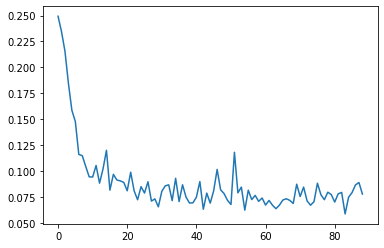

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.save(model.state_dict(), "model_after_train.pt")

plt.plot(all_losses)

In [ ]:
total = len(test_set)
number_right = 0
model.eval()
true_label = []
pred_label = []
pred_probs = []
miss_classes = []

with torch.no_grad():
    for idx, row in test_set.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['is_fake']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
        result = overall_output.max(0)[1].float().item()

        if result == label.item():
            number_right += 1
        else:
          miss_classes.append(idx)
        true_label += label.tolist()
        pred_probs.append(round(overall_output.max().tolist(), 4))
        pred_label.append(result)
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))

300/8980. Current accuracy: 0.98
600/8980. Current accuracy: 0.965
900/8980. Current accuracy: 0.9533333333333334
1200/8980. Current accuracy: 0.955
1500/8980. Current accuracy: 0.954
1800/8980. Current accuracy: 0.9488888888888889
2100/8980. Current accuracy: 0.9466666666666667
2400/8980. Current accuracy: 0.9458333333333333
2700/8980. Current accuracy: 0.947037037037037
3000/8980. Current accuracy: 0.946
3300/8980. Current accuracy: 0.9466666666666667
3600/8980. Current accuracy: 0.9444444444444444
3900/8980. Current accuracy: 0.9451282051282052
4200/8980. Current accuracy: 0.945
4500/8980. Current accuracy: 0.9433333333333334
4800/8980. Current accuracy: 0.9422916666666666
5100/8980. Current accuracy: 0.9431372549019608
5400/8980. Current accuracy: 0.9431481481481482
5700/8980. Current accuracy: 0.9422807017543859
6000/8980. Current accuracy: 0.9418333333333333
6300/8980. Current accuracy: 0.9423809523809524
6600/8980. Current accuracy: 0.9421212121212121
6900/8980. Current accuracy

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

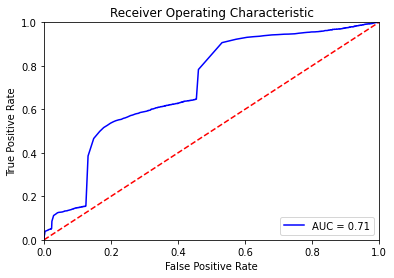

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(true_label, pred_probs)
roc_auc = metrics.auc(tpr, fpr)

plt.title('Receiver Operating Characteristic')
plt.plot(tpr,fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Let's look at some miss classfied articles

In [ ]:
test_set.filter(items = miss_classes, axis = 0)

,title,text,subject,date,is_fake
10,Obama's remarks on Orlando shooting: 'We will ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"June 12, 2016",True
121,Trump chooses fundraiser Scaramucci for ambass...,"WASHINGTON (Reuters) - Anthony Scaramucci, a R...",politicsNews,"June 8, 2017",True
143,REPORT: REAL REASON CHRIS CHRISTIE Was Demoted...,Something was bothering Donald Trump as he mad...,politics,"Nov 21, 2016",False
250,"Water entered missing Argentine sub's snorkel,...",BUENOS AIRES (Reuters) - Water entered the sno...,worldnews,"November 27, 2017",True
269,Malaysia arrests 20 over suspected terror links,KUALA LUMPUR (Reuters) - Malaysia has arrested...,worldnews,"December 22, 2017",True
...,...,...,...,...,...
8896,Naked Trump statues draw dozens of onlookers i...,NEW YORK (Reuters) - An artists’ collective to...,politicsNews,"August 18, 2016",True
8935,Trump hails 'great' cooperation with South Kor...,"CAMP HUMPHREYS, South Korea (Reuters) - U.S. P...",worldnews,"November 7, 2017",True
8951,Factbox: Key railroad assets in Hurricane Irma...,(Reuters) - Major eastern U.S. railroads CSX C...,worldnews,"September 8, 2017",True
8954,Factbox: Quotes on Suu Kyi's handling of Myanm...,"(Reuters) - Nearly 400,000 Rohingya Muslims ha...",worldnews,"September 14, 2017",True


The miss-classified articles could be the result of many imperfections in our data and also in our model,
Let's start with the imperfections in our data: Unbalanced dataset.
Notice how our data is slightly unbalanced, here we can try two approaches:

- **Weight balancing**
    
    Here we want some classes or training examples to have more weight if they are more important, but for our task both classes are important, giving some weight to one class indicates that it is more important to correctly classify this one and less important for the other, here fake news or real news is equally important to detect.
    
- **Over and under sampling**
    
    Here we could try to under sample our dataset and cut it to an equal distributed one.


**Non-representative data**
    
 Note that our data is heavily influenced by US news, which could affect the model when predicting news from other countries.

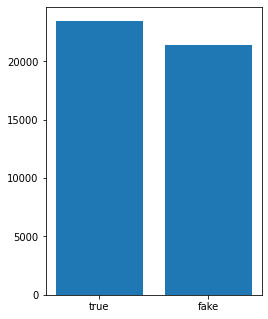

In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
langs = ["true", "fake"]
students = [len(true), len(false)]
ax.bar(langs,students)
plt.show()

Concerning our approach on building the model, we could out different things

- Classification accuracy depends directly on your feature engineering. Specifically looking at text classification problem, we can try using better word embedding for our text like Glove, and Elmo.
- We can also spend more time looking at our pre-processing the text data, for example, handling  stop words or common words
- Finally, try out other models.